In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
import hdbscan
import seaborn as sns

In [2]:
eeg_data = pd.read_csv('EEG_data/all_eeg_data.csv')

eeg_data = eeg_data.set_index('subject')

eeg_data.to_numpy().shape

(124, 24)

In [3]:
features = list(eeg_data.columns)
subjects = list(eeg_data.index)

scaled_eeg = RobustScaler().fit_transform(eeg_data.to_numpy())

scaled_eeg = pd.DataFrame(scaled_eeg, columns = features, index = subjects)

scaled_eeg.index.name = 'subject'

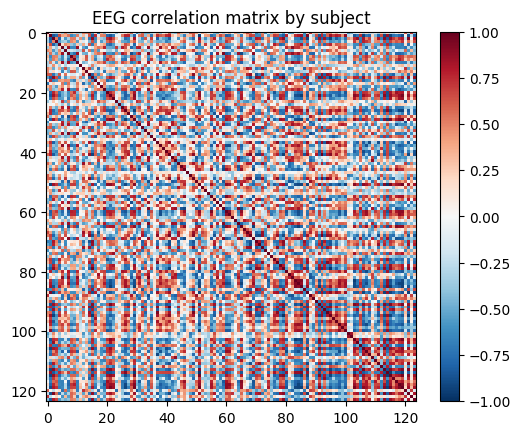

In [4]:
# Transpose data for each vector row to represent a single subject's 
## scaled EEG power across 24 regions + frequency band combindations
eeg_corr = scaled_eeg.transpose().corr(method = 'pearson')

plt.imshow(eeg_corr, interpolation = 'nearest', cmap = "RdBu_r", vmin = -1, vmax = 1);
plt.title("EEG correlation matrix by subject");
plt.colorbar();
plt.savefig("eeg_corr.png")

In [5]:
#add familial likelihood data to subject index
fl_df = pd.read_csv('familial_likelihood.csv')
eeg_subs = scaled_eeg.index.tolist()
fl_filtered = fl_df[fl_df['subject'].isin(eeg_subs)]
fl_filtered = fl_filtered[fl_filtered['likelihood_group'].notnull()]
eeg_filtered = scaled_eeg[scaled_eeg.index.isin(fl_filtered['subject'])]
fl_filtered = fl_filtered.set_index('subject')
df_joined = eeg_filtered.merge(fl_filtered, on = 'subject')
df_joined.index = df_joined['likelihood_group'] + df_joined.index.astype(str)
df_joined = df_joined.drop(columns = ['likelihood_group'])
df_joined = df_joined.sort_index()

df_joined

,alpha_Front_L,alpha_Parietal_L,alpha_Post_L,alpha_Temp_L,alpha_Front_R,alpha_Parietal_R,alpha_Post_R,alpha_Temp_R,beta_Front_L,beta_Parietal_L,...,beta_Post_R,beta_Temp_R,theta_Front_L,theta_Parietal_L,theta_Post_L,theta_Temp_L,theta_Front_R,theta_Parietal_R,theta_Post_R,theta_Temp_R
ADHD3022,0.293316,-0.120445,-0.189752,-0.183360,0.027244,0.421446,-0.648688,-0.575153,-0.862610,-0.728653,...,-1.007720,-1.205895,0.661976,0.727826,1.031990,0.910087,0.894659,0.327687,1.120924,1.268502
ADHD3038,-0.743495,-0.538875,-0.770768,-0.683460,-0.798622,-0.822421,-0.953655,-0.497130,-0.206907,0.358450,...,0.546208,0.064839,0.572915,0.259448,0.560298,0.093713,0.657898,0.184664,0.070768,0.215054
ADHD3048,3.530120,3.131179,3.490883,3.043155,3.886910,4.026325,3.737758,3.408543,-0.805812,-0.740331,...,-1.204206,-1.078330,-1.353575,-1.435964,-1.559163,-1.176194,-1.486803,-1.652992,-1.327900,-1.344147
ADHD3050,-0.536421,0.019245,0.098479,-0.006944,-0.068294,0.196019,0.150448,-0.400534,0.507036,-0.626411,...,-0.996251,0.780291,-1.523288,0.520817,0.573419,-1.294377,-0.638090,0.280016,0.697741,-1.377496
ADHD3060,0.283969,0.507841,1.501526,1.460769,0.419811,0.708660,1.748666,1.392594,-0.584096,0.154059,...,-0.732147,-0.399647,0.326882,-0.211691,-0.414509,-0.222556,0.194505,-0.198843,-0.378808,-0.387268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
typical3104,-0.228802,-0.355829,-0.197229,0.089388,-0.124873,-0.702048,-0.255022,-0.358805,0.742379,0.974702,...,0.815351,0.686954,0.008452,-0.053149,-0.053105,-0.472128,0.002040,0.041938,-0.002710,0.265289
typical3115,0.870019,0.678101,0.285706,0.926759,0.331289,0.345022,0.281009,0.027413,-0.385959,-0.425232,...,-0.177960,-0.723246,-0.008452,-0.021620,0.135194,-0.208556,0.155477,0.024505,0.072044,0.645419
typical3142,-0.024185,-0.027766,0.300111,-0.356424,0.234625,-0.293220,-0.500025,-0.026424,-0.402366,-0.531461,...,-0.422865,-0.524860,0.283308,0.388588,0.218193,0.118071,0.109339,0.529335,0.428316,0.138929
typical3161,0.039266,0.112200,0.019690,0.030168,0.329924,0.101859,0.436870,0.380061,0.487636,0.079366,...,-0.553822,-0.754733,-0.432821,0.128001,0.697416,0.659312,0.168309,0.121793,0.290455,0.471836


In [6]:
fl_filtered.astype('category').value_counts()

likelihood_group
autism              53
typical             22
ADHD                17
autism&ADHD         12
Name: count, dtype: int64

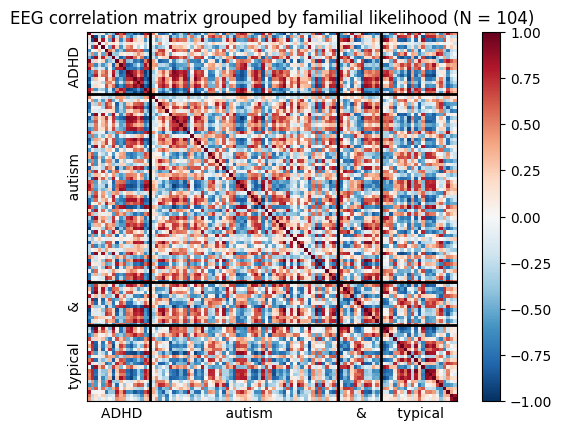

In [7]:
joined_sub_corr = df_joined.transpose().corr(method = 'pearson')

plt.imshow(joined_sub_corr, interpolation = 'nearest', cmap = "RdBu_r", vmin = -1, vmax = 1);
plt.title(f"EEG correlation matrix grouped by familial likelihood (N = {joined_sub_corr.shape[0]})");
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False);
plt.axhline(y = 17, color = "black", lw = 2);
plt.axhline(y = 70, color = "black", lw = 2);
plt.axhline(y = 82, color = "black", lw = 2);
plt.axvline(x = 17, color = "black", lw = 2);
plt.axvline(x = 70, color = "black", lw = 2);
plt.axvline(x = 82, color = "black", lw = 2);
plt.xlabel("ADHD                   autism                   &       typical");
plt.ylabel("typical       &                       autism               ADHD");
plt.colorbar();
plt.savefig("combined_eeg_corr.png")

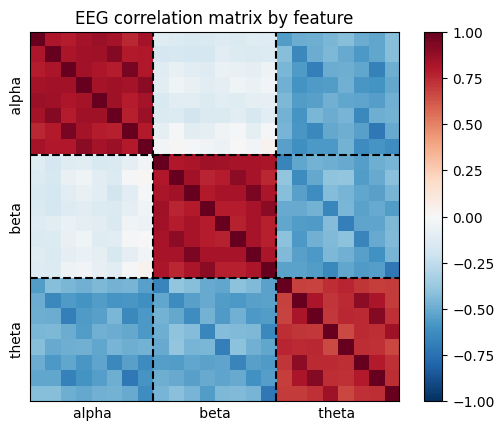

In [8]:
var_corr = df_joined.corr(method = "pearson")

plt.imshow(var_corr, interpolation = 'nearest', cmap = "RdBu_r", vmin = -1, vmax = 1);
plt.title("EEG correlation matrix by feature");
plt.xlabel("alpha                    beta                    theta");
plt.ylabel("theta                    beta                    alpha");
plt.colorbar();
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False);
plt.axhline(y = 7.5, color = "black", ls = "--");
plt.axhline(y = 15.5, color = "black", ls = "--");
plt.axvline(x = 7.5, color = "black", ls = "--");
plt.axvline(x = 15.5, color = "black", ls = "--");
plt.savefig("eeg_corr_var.png")

In [9]:
def label(group):
    if group == 'ADHD':
        return 1
    elif group == 'autism':
        return 2
    elif group == 'autism&ADHD':
        return 3
    elif group == 'typical':
        return 0
    else:
        return 7

In [10]:
eeg_joined = scaled_eeg.merge(fl_filtered, on = 'subject', how = 'outer').fillna(0)
eeg_joined['fl_lab'] = eeg_joined['likelihood_group'].apply(label)

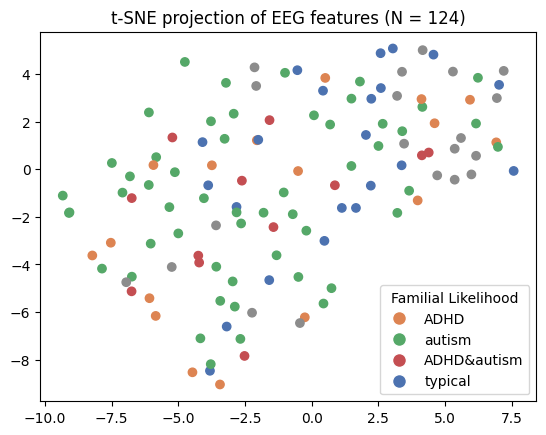

In [11]:
from matplotlib.lines import Line2D

tsne_projection = TSNE().fit_transform(scaled_eeg.to_numpy())

color_palette = sns.color_palette('deep', 8)

colors = [color_palette[x] for x in eeg_joined['fl_lab']]

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[1], markersize=10, label='ADHD'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[2], markersize=10, label='autism'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[3], markersize=10, label='ADHD&autism'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[0], markersize=10, label='typical')]

plt.scatter(*tsne_projection.T, c=colors);
plt.legend(handles = legend_elements, title='Familial Likelihood');
plt.title(f"t-SNE projection of EEG features (N = {scaled_eeg.shape[0]})");
plt.savefig("eeg_tsne_fl.png")

In [12]:
cluster_data = scaled_eeg.to_numpy()

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True).fit(cluster_data)

clusterer1 = hdbscan.HDBSCAN(min_cluster_size=4, gen_min_span_tree=True).fit(cluster_data)

clusterer2 = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True).fit(cluster_data)

clusterer3 = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True).fit(cluster_data)

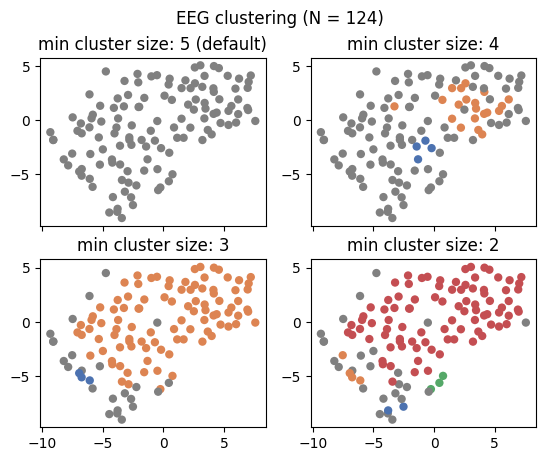

In [13]:
# specify color palette from seaborn
color_palette = sns.color_palette('deep', 20)

# plot1
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

#plot2
cluster1_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer1.labels_]

#plot3
cluster2_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer2.labels_]

#plot4
cluster3_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer3.labels_]

# subplots for varying min cluster size parameter (2-5)
fig, axs = plt.subplots(2, 2, sharex = True)
axs[0,0].scatter(*tsne_projection.T, linewidth=0, c=cluster_colors)
axs[0,0].set_title('min cluster size: 5 (default)')
axs[0,1].scatter(*tsne_projection.T, linewidth=0, c=cluster1_colors)
axs[0,1].set_title('min cluster size: 4')
axs[1,0].scatter(*tsne_projection.T, linewidth=0, c=cluster2_colors)
axs[1,0].set_title('min cluster size: 3')
axs[1,1].scatter(*tsne_projection.T, linewidth=0, c=cluster3_colors)
axs[1,1].set_title('min cluster size: 2')
fig.suptitle(f'EEG clustering (N = {cluster_data.shape[0]})');
fig.savefig("compare_hbdscan_eeg.png")

In [14]:
clusterer10 = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, gen_min_span_tree=True).fit(cluster_data)

clusterer11 = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=1).fit(cluster_data)

clusterer12 = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1).fit(cluster_data)

clusterer13 = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1).fit(cluster_data)

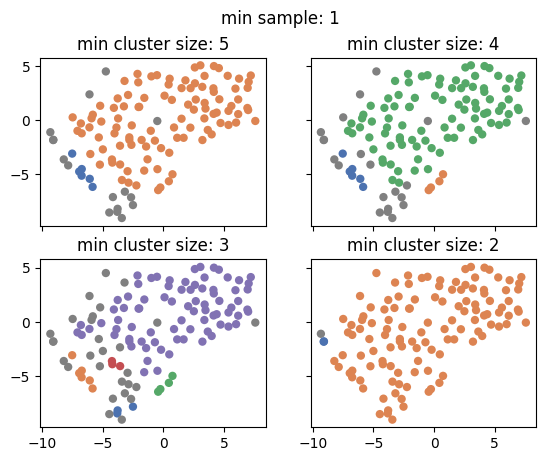

In [15]:
# plot1
cluster10_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer10.labels_]

#plot2
cluster11_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer11.labels_]

#plot3
cluster12_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer12.labels_]

#plot4
cluster13_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer13.labels_]

# subplots for varying min cluster size parameter (2-5)
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)
axs[0,0].scatter(*tsne_projection.T, linewidth=0, c=cluster10_colors)
axs[0,0].set_title('min cluster size: 5')
axs[0,1].scatter(*tsne_projection.T, linewidth=0, c=cluster11_colors)
axs[0,1].set_title('min cluster size: 4')
axs[1,0].scatter(*tsne_projection.T, linewidth=0, c=cluster12_colors)
axs[1,0].set_title('min cluster size: 3')
axs[1,1].scatter(*tsne_projection.T, linewidth=0, c=cluster13_colors)
axs[1,1].set_title('min cluster size: 2')
fig.suptitle('min sample: 1');
fig.savefig("1compare_hbdscan_eeg.png")

In [16]:
clusterer20 = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=2).fit(cluster_data)

clusterer21 = hdbscan.HDBSCAN(min_cluster_size=4,min_samples=2).fit(cluster_data)

clusterer22 = hdbscan.HDBSCAN(min_cluster_size=3,min_samples=2).fit(cluster_data)

clusterer23 = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=2).fit(cluster_data)

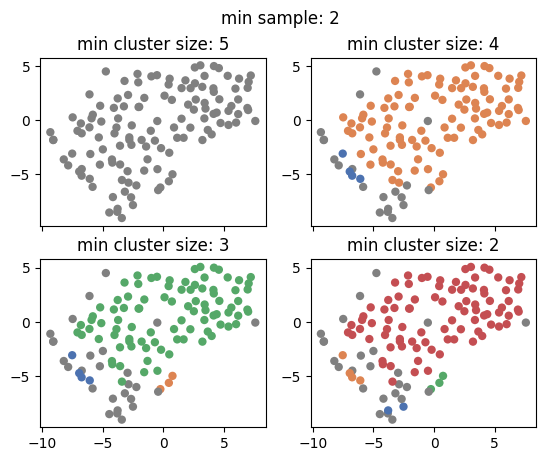

In [17]:
# plot1
cluster20_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer20.labels_]

#plot2
cluster21_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer21.labels_]

#plot3
cluster22_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer22.labels_]

#plot4
cluster23_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer23.labels_]

# subplots for varying min cluster size parameter (2-5)
fig, axs = plt.subplots(2, 2, sharex = True)
axs[0,0].scatter(*tsne_projection.T, linewidth=0, c=cluster20_colors)
axs[0,0].set_title('min cluster size: 5')
axs[0,1].scatter(*tsne_projection.T, linewidth=0, c=cluster21_colors)
axs[0,1].set_title('min cluster size: 4')
axs[1,0].scatter(*tsne_projection.T, linewidth=0, c=cluster22_colors)
axs[1,0].set_title('min cluster size: 3')
axs[1,1].scatter(*tsne_projection.T, linewidth=0, c=cluster23_colors)
axs[1,1].set_title('min cluster size: 2')
fig.suptitle('min sample: 2');
fig.savefig("2compare_hbdscan_eeg.png")

In [18]:
clusterer30 = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=3).fit(cluster_data)

clusterer31 = hdbscan.HDBSCAN(min_cluster_size=4,min_samples=3).fit(cluster_data)

clusterer32 = hdbscan.HDBSCAN(min_cluster_size=3,min_samples=3).fit(cluster_data)

clusterer33 = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=3).fit(cluster_data)

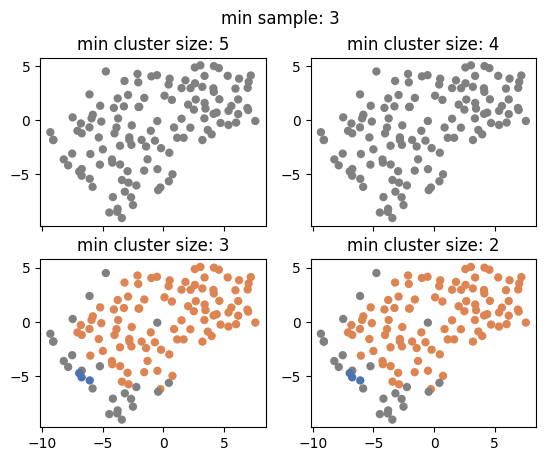

In [19]:
# plot1
cluster30_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer30.labels_]

#plot2
cluster31_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer31.labels_]

#plot3
cluster32_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer32.labels_]

#plot4
cluster33_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer33.labels_]

# subplots for varying min cluster size parameter (2-5)
fig, axs = plt.subplots(2, 2, sharex = True)
axs[0,0].scatter(*tsne_projection.T, linewidth=0, c=cluster30_colors)
axs[0,0].set_title('min cluster size: 5')
axs[0,1].scatter(*tsne_projection.T, linewidth=0, c=cluster31_colors)
axs[0,1].set_title('min cluster size: 4')
axs[1,0].scatter(*tsne_projection.T, linewidth=0, c=cluster32_colors)
axs[1,0].set_title('min cluster size: 3')
axs[1,1].scatter(*tsne_projection.T, linewidth=0, c=cluster33_colors)
axs[1,1].set_title('min cluster size: 2')
fig.suptitle('min sample: 3');
fig.savefig("3compare_hbdscan_eeg.png")

In [20]:
clusterer40 = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=4).fit(cluster_data)

clusterer41 = hdbscan.HDBSCAN(min_cluster_size=4,min_samples=4).fit(cluster_data)

clusterer42 = hdbscan.HDBSCAN(min_cluster_size=3,min_samples=4).fit(cluster_data)

clusterer43 = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=4).fit(cluster_data)

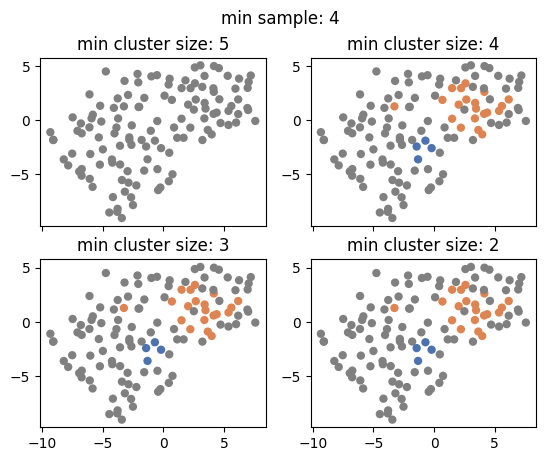

In [21]:
# plot1
cluster40_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer40.labels_]

#plot2
cluster41_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer41.labels_]

#plot3
cluster42_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer42.labels_]

#plot4
cluster43_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer43.labels_]

# subplots for varying min cluster size parameter (2-5)
fig, axs = plt.subplots(2, 2, sharex = True)
axs[0,0].scatter(*tsne_projection.T, linewidth=0, c=cluster40_colors)
axs[0,0].set_title('min cluster size: 5')
axs[0,1].scatter(*tsne_projection.T, linewidth=0, c=cluster41_colors)
axs[0,1].set_title('min cluster size: 4')
axs[1,0].scatter(*tsne_projection.T, linewidth=0, c=cluster42_colors)
axs[1,0].set_title('min cluster size: 3')
axs[1,1].scatter(*tsne_projection.T, linewidth=0, c=cluster43_colors)
axs[1,1].set_title('min cluster size: 2')
fig.suptitle('min sample: 4');
fig.savefig("4compare_hbdscan_eeg.png")

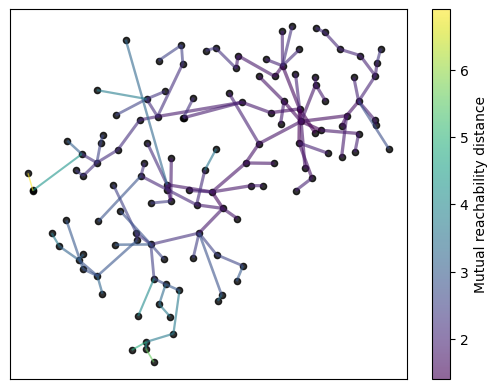

In [22]:
clusterer2.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                       edge_alpha=0.6,
                                       node_size=20,
                                       edge_linewidth=1);
plt.savefig('eeg_mstree.png')

labels: [-1  0  1] 
 count: [24  3 97]


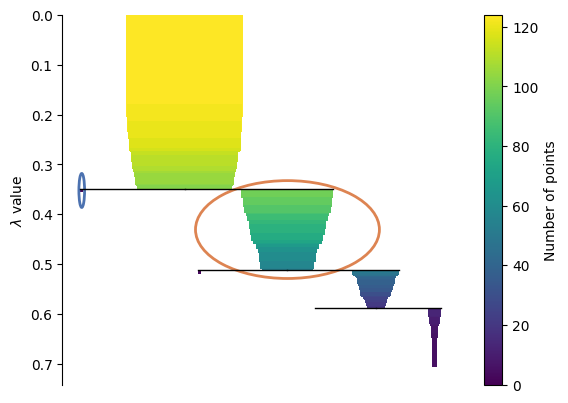

In [23]:
unique, frequency = np.unique(clusterer2.labels_,
                              return_counts = True)

print(f'labels: {unique} \n count: {frequency}')


clusterer2.condensed_tree_.plot(select_clusters=True,
                                selection_palette=sns.color_palette('deep', 8));
plt.savefig('eeg_ctree.png')

In [24]:
cluster_labs = pd.DataFrame(index=scaled_eeg.index, data=list(clusterer2.labels_), columns=['cluster_lab'])

cluster_labs['cluster_prob'] = list(clusterer2.probabilities_)

cluster_labs.to_csv('eeg_cluster.csv')

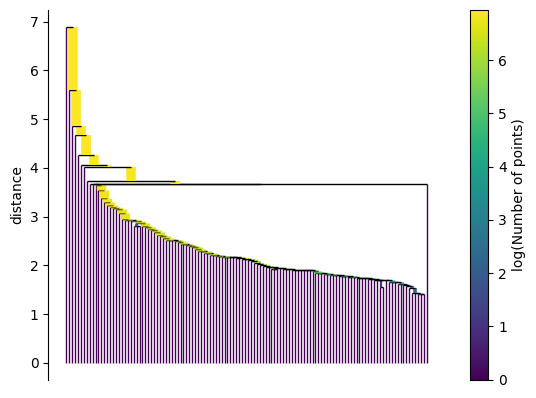

In [26]:
clusterer2.single_linkage_tree_.plot();